### Tehran housing price data analysis
I will present an analysis about renting a house price in this notebook. Housing data is generated from Tehran Divar website and the dataset contains data about renting house in Theran at the end of 1402. I use different types of ML Methods for evaluating model and comparing the results of those types.

In [65]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!pip install Unidecode
from unidecode import unidecode

!pip install arabic-reshaper
!pip install python-bidi
from bidi.algorithm import get_display
from arabic_reshaper import reshape

### Why Tehran housing price
There are some major reasons for me to do this research:

1.Population: Tehran is the capital and major city in Iran. It also hosts more than 9 million population in 2021, which makes it the second populated city in the middle east.

2.Housing transactions: More than 83,000 housing transactions are being made per year in Tehran.

3.Housing price: Housing price has rappidly grown during the last decade in Tehran (notice the graph bellow).

4.Districts: Tehran consists of 22 districts and many neighbourhoods, so finding a good and cheap place to live seems difficault.

As I said, prices are growing up sharply (for both rent and buy a house), there are too many transactions, there are many neighbourhoods in Tehran and many people are requesting to buy or rent a house per month. Therefore, studying this field and making a comprehensive dataset seems necessary for both landloards and tenants.

### Combine All Datasets

In [66]:
# combine all data in path .\Divar_WebScrap\Data\Data_clean_*.csv

path = './Divar_WebScrap/Data'
files = os.listdir(path)
files = [f for f in files if f.startswith('Data_clean_')]
df = pd.concat([pd.read_csv(os.path.join(path, f)) for f in files], ignore_index=True)



### Reading Data
Data stored in csv file has 12,383 records containing 9 features. Features are:

1. **total_value**: is the overall value of the house. It is calculated based on deposit and monthly rent.
2. **neighborhood**: is filled based on the house position in Tehran.
3. **area**: is the area of house in squared meter.
4. **year**: is the year that the house is built.
5. **deposit**: is the deposit of house in Iran currency (Tooman).
6. **rent**: is the monthly rent of house in Iran currency (Tooman).
7. **elavator**: indicates that house has elavator (1 for has and 0 for dose not have).
8. **parking**: indicates that house has parking lot (1 for has and 0 for dose not have).
9. **warehouse**: indicates that house has warehouse (1 for has and 0 for dose not have).

In [67]:
# remove duplicates
df.drop_duplicates(subset =None, keep = 'first', inplace = True)

df['neighborhood'] = df['neighborhood'].astype(pd.StringDtype())

df.shape

(2205, 12)

In [68]:
df.head(5)

,total_value,neighborhood,area,year,deposit,rent,elavator,parking,room,unitFloor,longitude,latitude
0,4.000900e+08,افسریه,61,1399,4.000000e+08,3000000.0,1,1,2,3,51.498425,35.632595
1,4.600000e+09,هروی,200,1402,4.600000e+09,0.0,1,1,3,5,51.479416,35.768784
2,1.450000e+09,سعادت‌آباد,85,1395,1.450000e+09,0.0,1,1,2,3,NaN,NaN
3,1.100090e+09,باغ فیض,90,1402,1.100000e+09,3000000.0,1,1,2,3,51.319279,35.740556
4,1.001800e+09,زعفرانیه,150,1390,1.000000e+09,60000000.0,1,1,3,4,NaN,NaN


### Data summarization
As you will see, the data set has 14 useful and clean features and 1 goal feature which is total_value. All columns of dataset has defined types so that we can work with them easily.

As I said before, total_value has been calculated based on deposit and rent, therefore I need to remove those 2 columns. At last dataset will have 6 features and 1 goal feature.

I grouped data by neighborhood feature and get a summary for the total_value field. You can see the maximum, minimm, median, count and variance of total_value in each neighborhood. You may also notice

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2705
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_value   2205 non-null   float64
 1   neighborhood  2205 non-null   string 
 2   area          2205 non-null   int64  
 3   year          2205 non-null   int64  
 4   deposit       2205 non-null   float64
 5   rent          2205 non-null   float64
 6   elavator      2205 non-null   int64  
 7   parking       2205 non-null   int64  
 8   room          2205 non-null   int64  
 9   unitFloor     2205 non-null   int64  
 10  longitude     1015 non-null   float64
 11  latitude      1015 non-null   float64
dtypes: float64(5), int64(6), string(1)
memory usage: 223.9 KB


In [70]:
df_group = df.groupby('neighborhood')[['total_value']].agg([np.min ,np.max, np.mean, np.var, 'count']).reset_index().sort_values(by=('total_value', 'count'), ascending=False)
df_group

neighborhood   total_value                                            \
                             amin          amax          mean           var   
118      سعادت‌آباد  8.003000e+06  1.000300e+10  1.930139e+09  4.410410e+18   
226            پونک  1.003000e+06  1.900000e+09  6.954375e+08  2.238737e+17   
52   تهرانپارس غربی  6.517400e+07  2.500003e+09  6.083870e+08  2.224632e+17   
94             دروس  1.800000e+06  9.000000e+09  2.314157e+09  4.975733e+18   
182          قیطریه  1.002700e+08  6.000000e+09  9.950121e+08  8.525253e+17   
..              ...           ...           ...           ...           ...   
160          شیرازی  3.012600e+08  3.012600e+08  3.012600e+08           NaN   
156     شهید دستغیب  7.000000e+08  7.000000e+08  7.000000e+08           NaN   
155    شهید بروجردی  5.000000e+08  5.000000e+08  5.000000e+08           NaN   
154      شهید آوینی  5.500000e+08  5.500000e+08  5.500000e+08           NaN   
0             آبشار  1.000000e+09  1.000000e+09  1.000000e+09           NaN   

           
    count  
118   109  
226    88  
52     68  
94     62  
182    59  
..    ...  
160     1  
156     1  
155     1  
154     1  
0       1  

[249 rows x 6 columns]

### top 15 neighbourhoods according to ads count
I also calculated the number of ads in each neighborhood and sorted them in descending order. You can see the top 15 neighborhoods in Tehran.

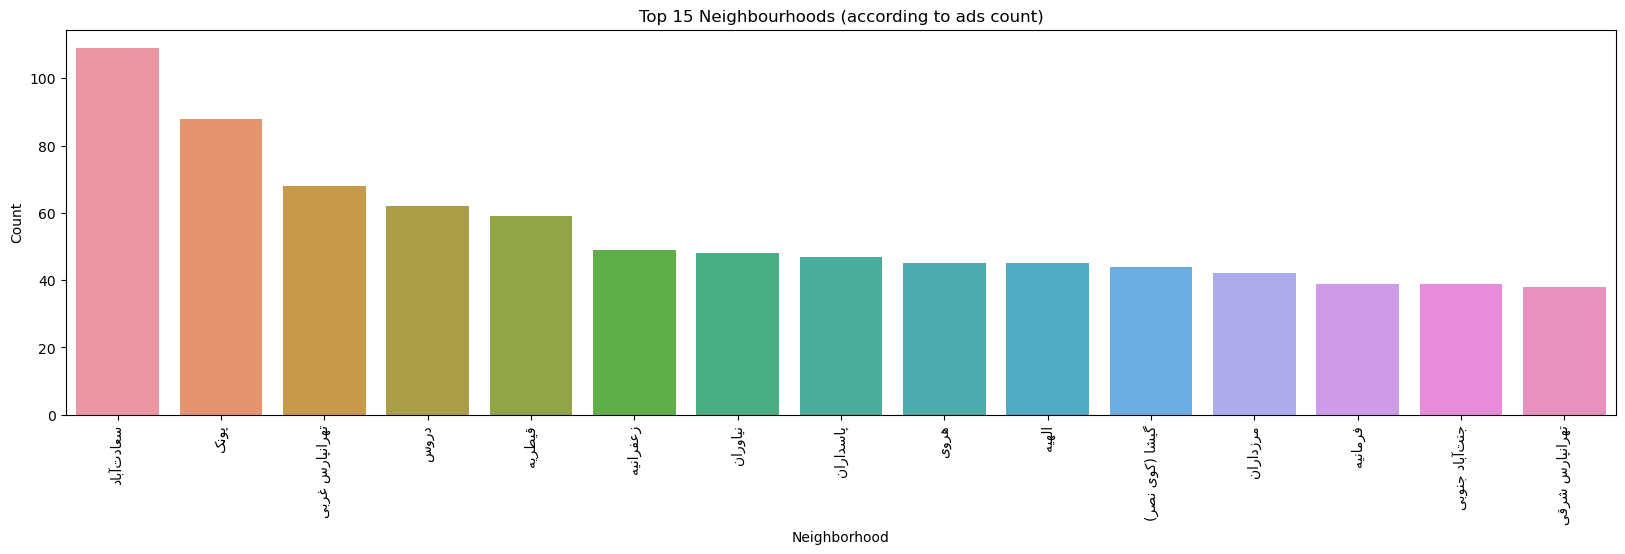

In [71]:
# Show top 15 neighborhoods according to ads count
# create a nw column for reshaping the neighborhood names with their counts
df_head_provinces = df.groupby('neighborhood').size().reset_index(name='count')
df_head_provinces = df_head_provinces[df_head_provinces['count'] > 5].sort_values(by='count', ascending=False)
df_top_15 = df_head_provinces.head(15)
plt.figure(figsize= (20, 5))
# create plot using sns
sns.barplot(data = df_top_15, x = [get_display(reshape(label)) for label in df_top_15.neighborhood], y = 'count')
# plt.xlabel(get_display(reshape('محله ')))
# plt.ylabel(get_display(reshape('تعداد')))
# plt.title(get_display(reshape('15 محله پر آگهی')))

plt.xlabel('Neighborhood');
plt.ylabel('Count');
plt.title('Top 15 Neighbourhoods (according to ads count)');

plt.xticks(rotation = "vertical")
plt.show()

### Features correlation and distribution
To have a deep view of data, I calculate correlation between features. As you can see in figure, the goal feature (total_value) has the highest correlation to area. To omit the affect of neighbourhood on correlation calculation, I calculate the correlation for records of 1 neighbourhood (سعادت آباد). You can sense the affect of neighbourhood on total_value in the figure too.

Therefore, it seems that area and neighbourhood are the most important features in the dataset and focusing on them will help us to generate a better predicting model.

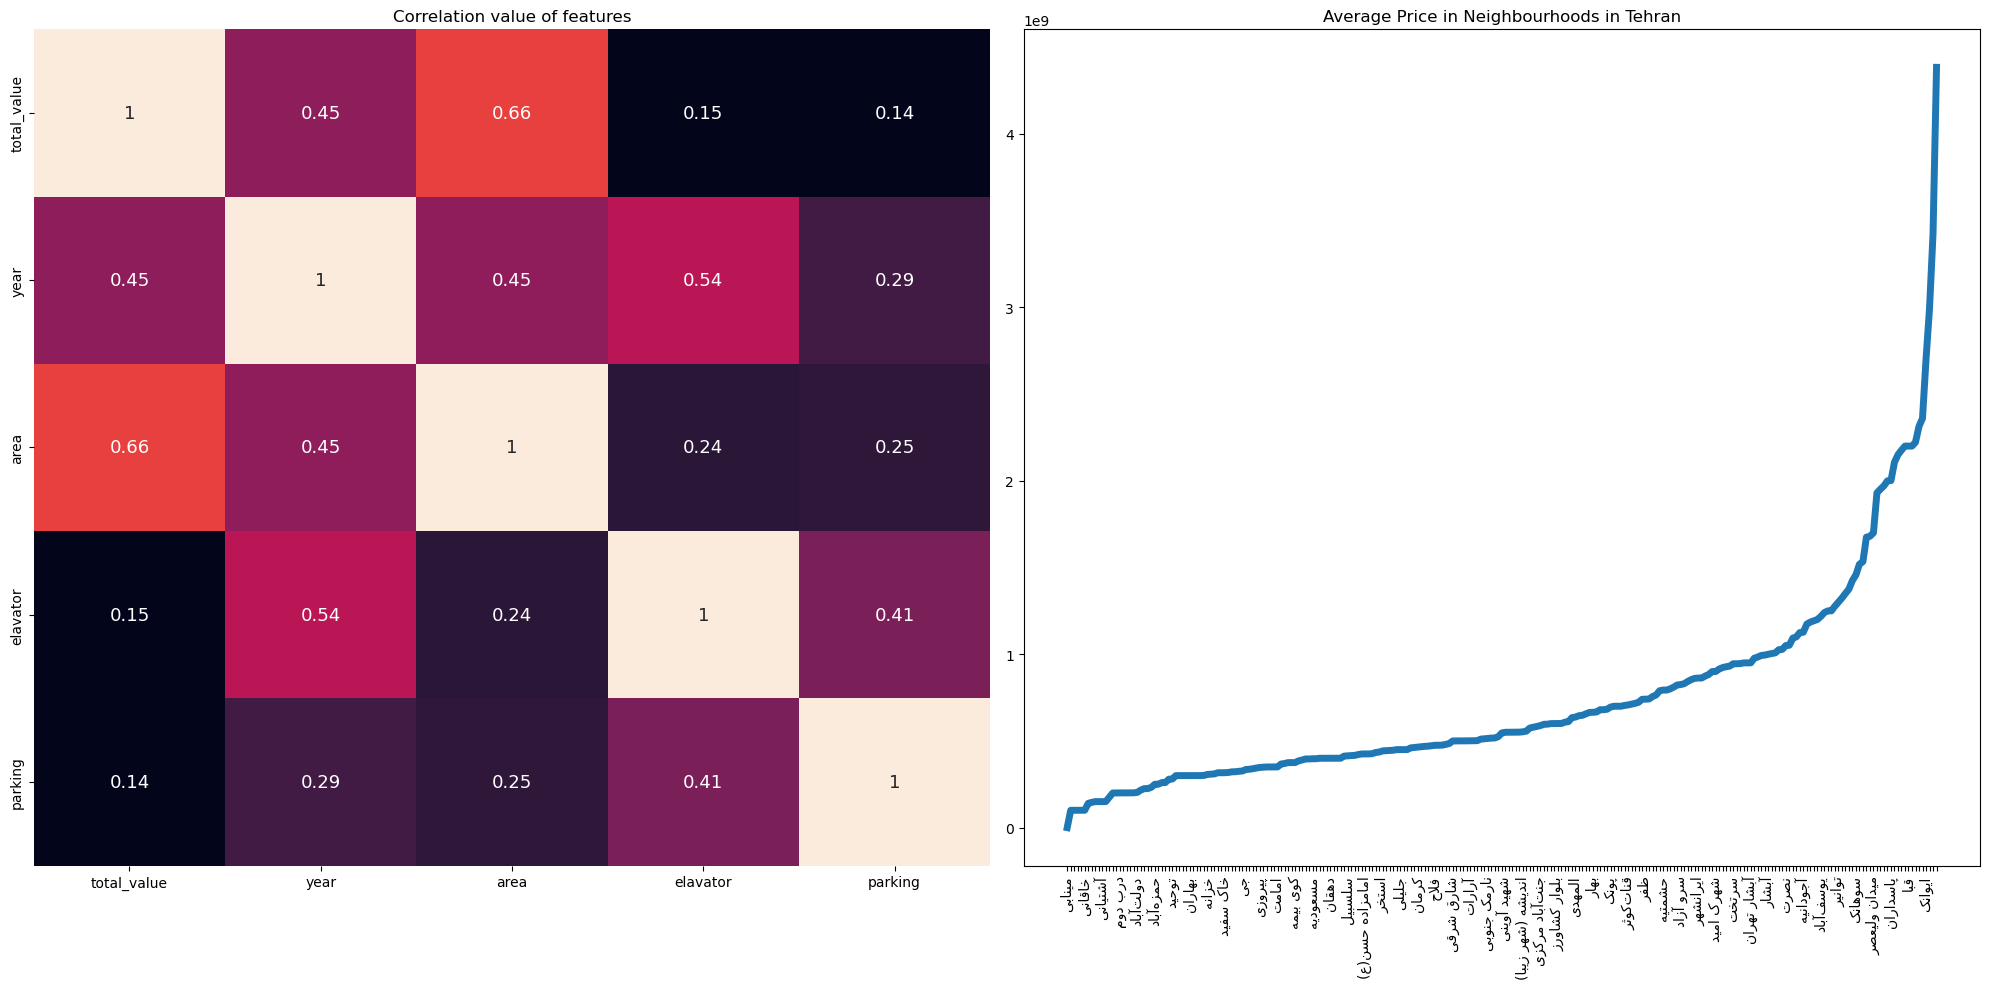

In [72]:
fig , axes = plt.subplots(1,2,figsize = (20, 10))

df_temp = df[(df['neighborhood'].str.contains('سعادت')) & (df['total_value']<5e10) & (df['total_value']!=0)]
df_temp = df_temp[['total_value','year','area','elavator','parking']]
g1 = sns.heatmap(df_temp.corr(),annot=True, annot_kws={"size": 13},cbar=False,ax=axes[0])
g1.set(title='Correlation value of features');
# plt.setp(axes[0].get_xticklabels(), rotation=90)


df_temp = df.groupby('neighborhood')[['total_value']].mean().reset_index()
df_temp = df_temp.sort_values('total_value')
g2 = sns.lineplot(data=df_temp, x = [get_display(reshape(label)) for label in df_temp['neighborhood']]
                  , y="total_value",linewidth = 5,ax=axes[1])

for ind, label in enumerate(g2.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
g2.set(title='Average Price in Neighbourhoods in Tehran');
g2.set(ylabel='');
# g2.set(xlabel='Neighbourhood')
plt.setp(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

To test data distribution, I use scatter plot. The main numeric feature of dataset is area and the goal feature is total_value. So plotting area as x vector and total_value as y vector, will be useful. The key point is, I should plot data for each neighbourhood separatedly.This will result in correct analysis. I picked the neighbourhood with the most number of samples for plotting and it is سعادت.

As you can see below, there is a relation between area and total_value. As area increases, total_value increases too. So it seems that regression algorithms may result in good predictions.

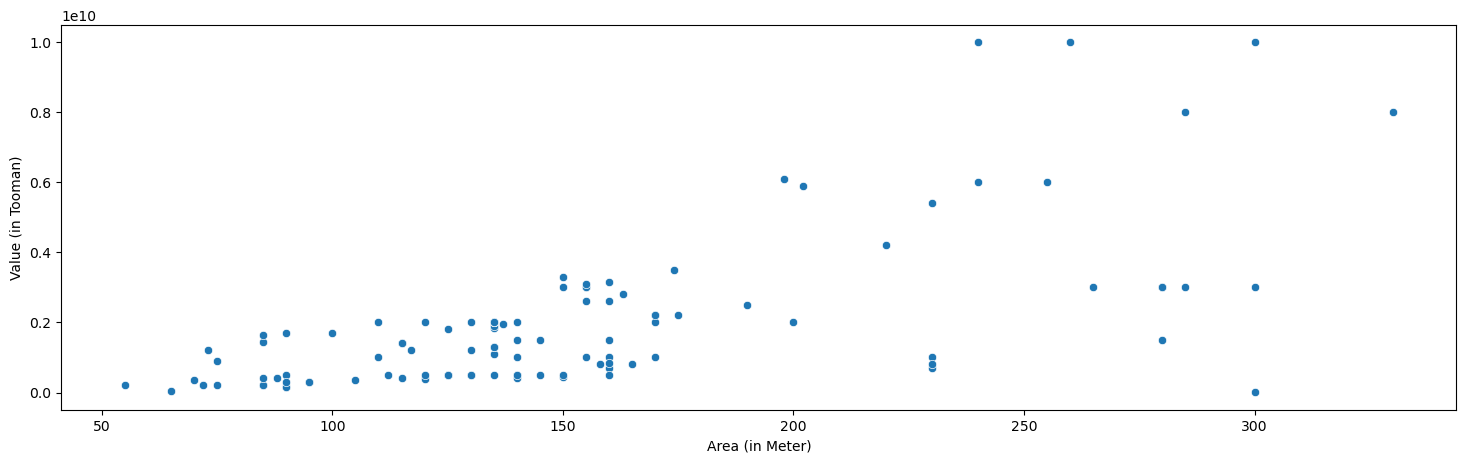

In [73]:
plt.figure(figsize= (18,5))

df_temp = df[(df['neighborhood'].str.contains('سعادت')) & (df['total_value']<5e10) & (df['total_value']!=0)]

sns.scatterplot(x = "area", y = "total_value", data = df_temp,)
plt.xlabel('Area (in Meter)');
plt.ylabel('Value (in Tooman)');
plt.show()

### Removing useless records (outliers)
Some houses have very unusual total_value or area. I consider them as outliers and remove them all and show them in graph below.

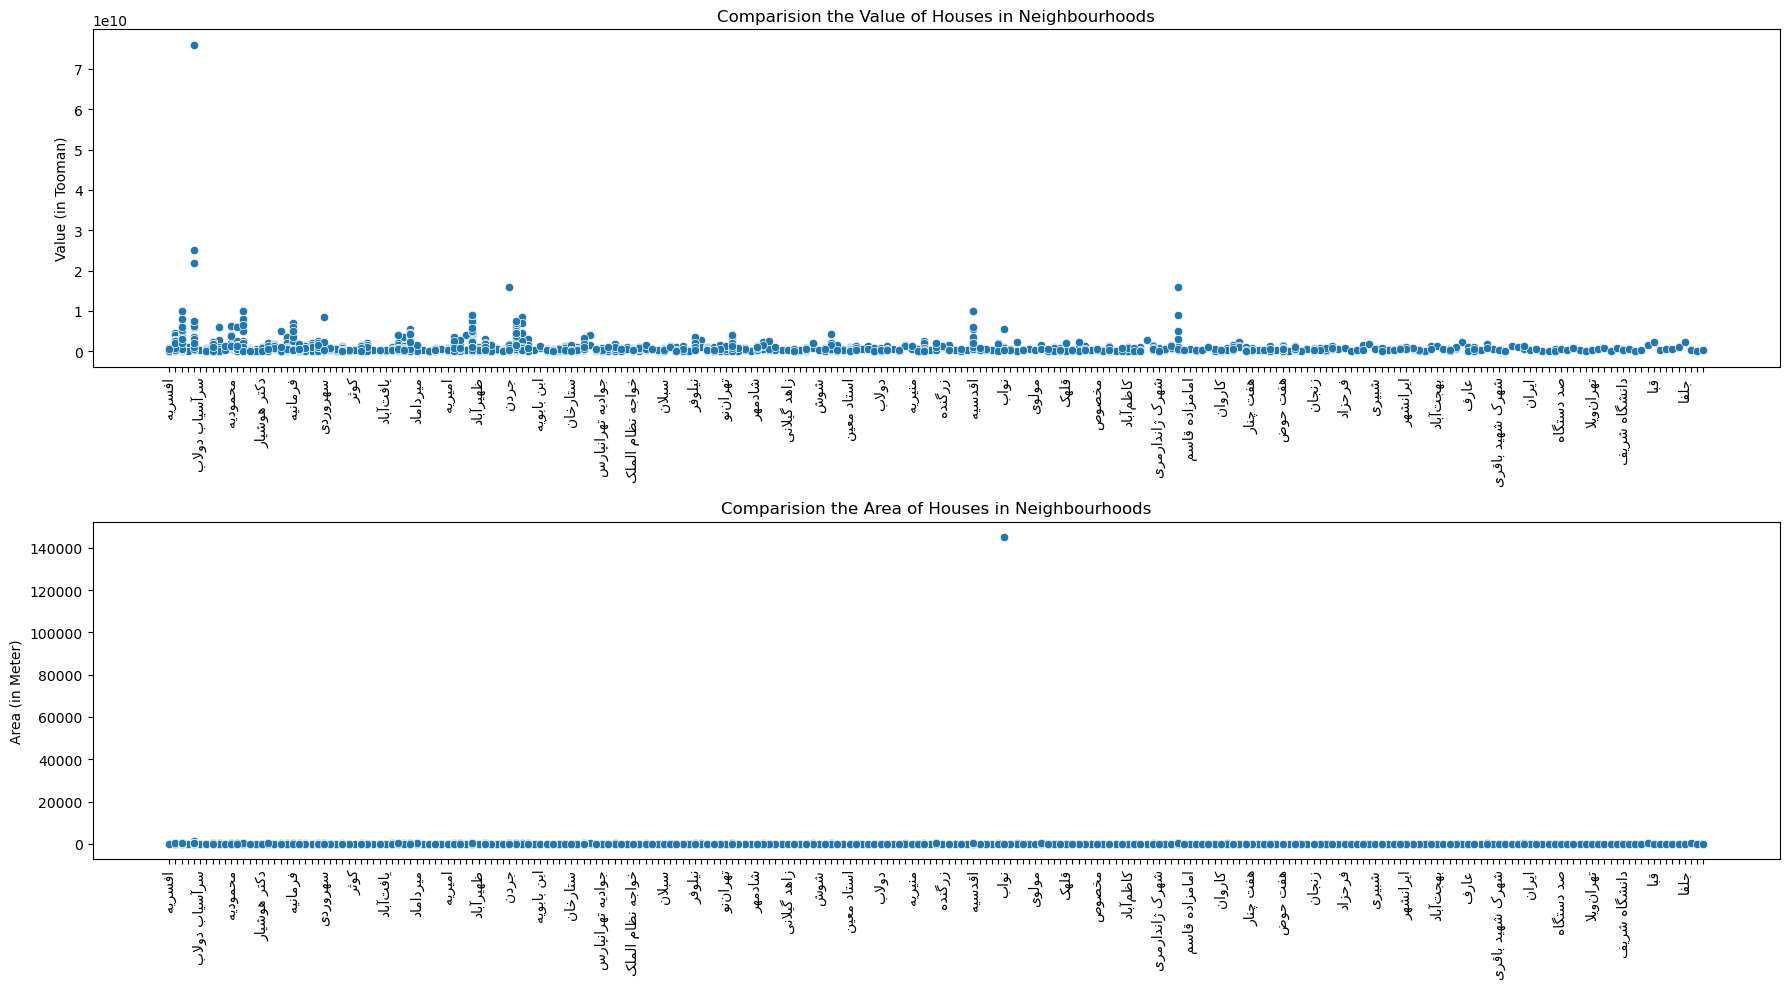

In [76]:
fig , axes = plt.subplots(2,1,figsize = (18, 10))
g1 = sns.scatterplot(x = [get_display(reshape(label)) for label in df['neighborhood']]
                     , y = "total_value", data = df, ax=axes[0])
# g1.set(title=get_display(reshape('ارزش ملک در محله ها')))
# g1.set(ylabel=get_display(reshape('ارزش ملک')))
g1.set(title='Comparision the Value of Houses in Neighbourhoods');
g1.set(ylabel='Value (in Tooman)');
for ind, label in enumerate(g1.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
g1.set(xlabel=None)
plt.setp(axes[0].get_xticklabels(), rotation=90)


g2 = sns.scatterplot(x = [get_display(reshape(label)) for label in df['neighborhood']]
                     , y = "area", data = df, ax=axes[1])
# g2.set(title=get_display(reshape('متراژ ملک در محله ها')))
# g2.set(ylabel=get_display(reshape('متراژ ملک')))
g2.set(title='Comparision the Area of Houses in Neighbourhoods');
g2.set(ylabel='Area (in Meter)');
for ind, label in enumerate(g2.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
g2.set(xlabel=None)
plt.setp(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [78]:
df_temp = df[(df['total_value'] > 30000000000) | (df['area'] >= 100000)]
df_temp.head(10)

,total_value,neighborhood,area,year,deposit,rent,elavator,parking,room,unitFloor,longitude,latitude
408,9.500000e+08,نواب,145000,1401,9.500000e+08,0.0,1,1,3,1,51.381749,35.661460
1683,7.600000e+10,زعفرانیه,1250,1402,7.600000e+10,0.0,1,1,4,8,51.412900,35.805626


In [79]:
# Removing outliers
df_temp = df[df['total_value'] > 30000000000]
# print (df_temp)
print('Outliers count the field of total_value:',df_temp['neighborhood'].count())
df = df[df['total_value'] < 30000000000]

df_temp = df[df['area']  >= 100000]
print('Outliers count the field of area:',df_temp['neighborhood'].count())
# print(df_temp)
df = df[df['area'] < 100000]

print('Final valid data count:',df['neighborhood'].count())

Outliers count the field of total_value: 1
Outliers count the field of area: 1
Final valid data count: 2203


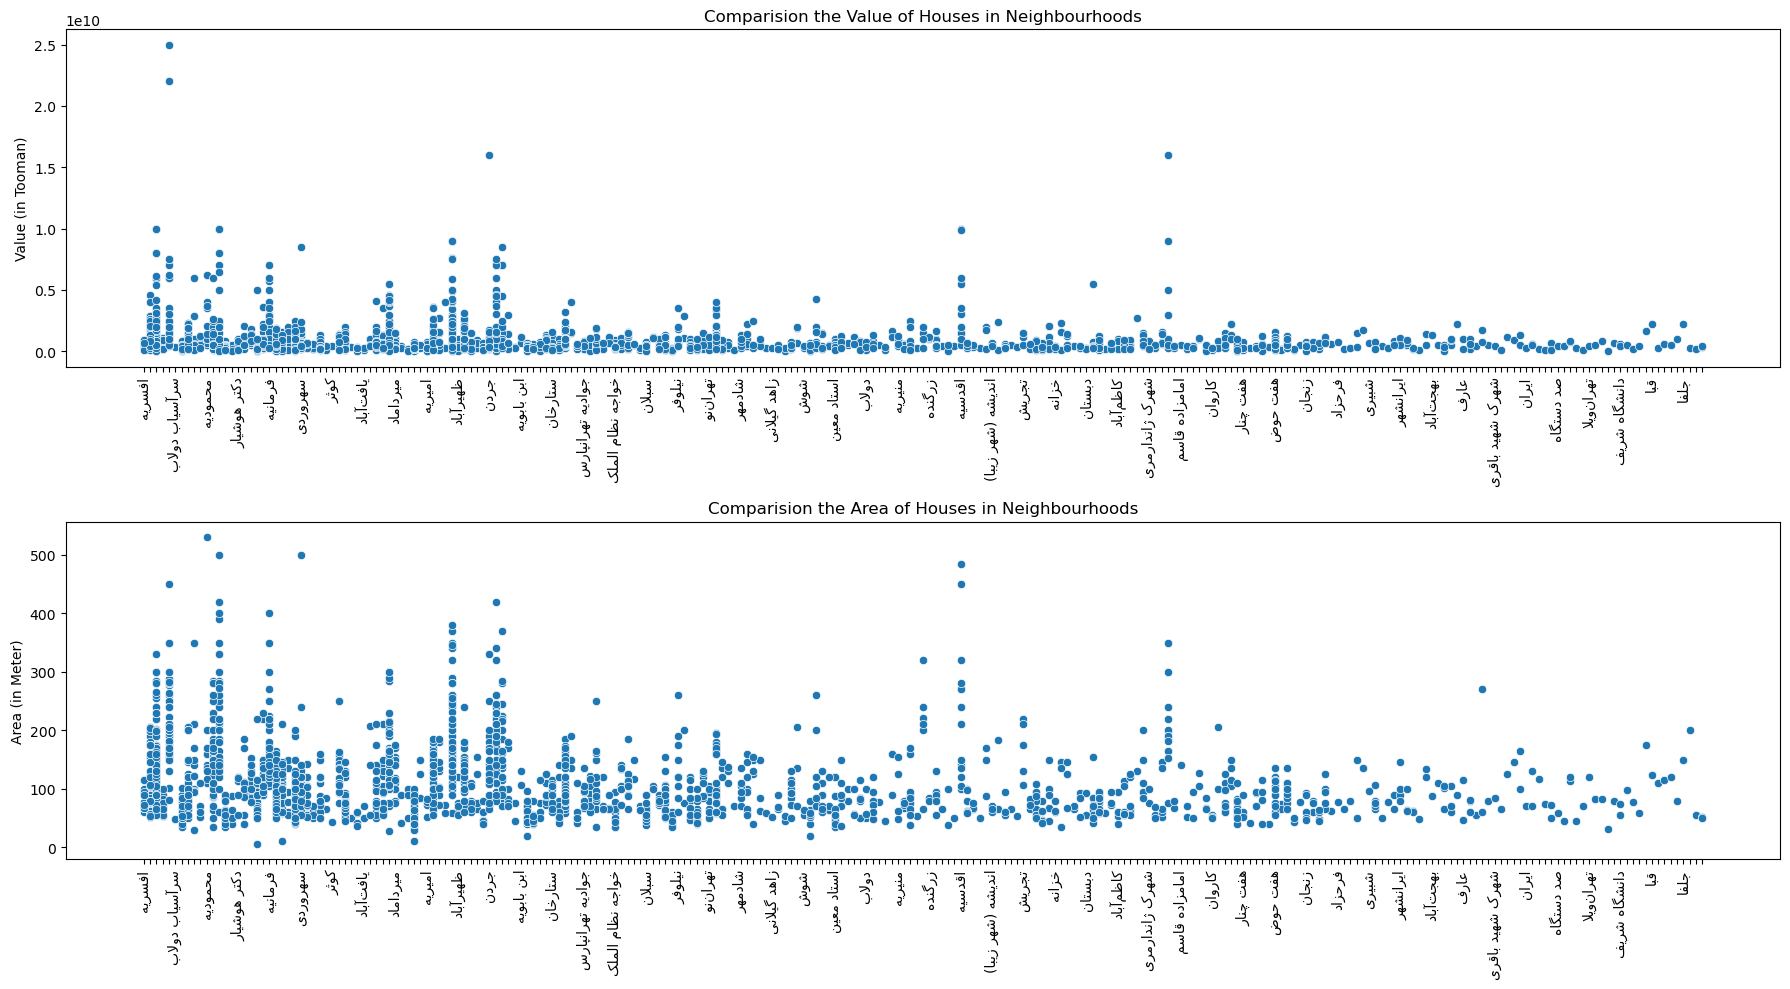

In [80]:
fig , axes = plt.subplots(2,1,figsize = (18, 10))
g1 = sns.scatterplot(x = [get_display(reshape(label)) for label in df['neighborhood']]
                     , y = "total_value", data = df, ax=axes[0])
# g1.set(title=get_display(reshape('ارزش ملک در محله ها')))
# g1.set(ylabel=get_display(reshape('ارزش ملک')))
g1.set(title='Comparision the Value of Houses in Neighbourhoods');
g1.set(ylabel='Value (in Tooman)');
for ind, label in enumerate(g1.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
g1.set(xlabel=None)
plt.setp(axes[0].get_xticklabels(), rotation=90)


g2 = sns.scatterplot(x = [get_display(reshape(label)) for label in df['neighborhood']]
                     , y = "area", data = df, ax=axes[1])
# g2.set(title=get_display(reshape('متراژ ملک در محله ها')))
# g2.set(ylabel=get_display(reshape('متراژ ملک')))
g2.set(title='Comparision the Area of Houses in Neighbourhoods');
g2.set(ylabel='Area (in Meter)');
for ind, label in enumerate(g2.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
g2.set(xlabel=None)
plt.setp(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

### Final valid data
At the end of data purification, dataset will consist of 2203 records. You can see distribution of data in top 15 neighbourhoods (according to sample counts), in the following graph.

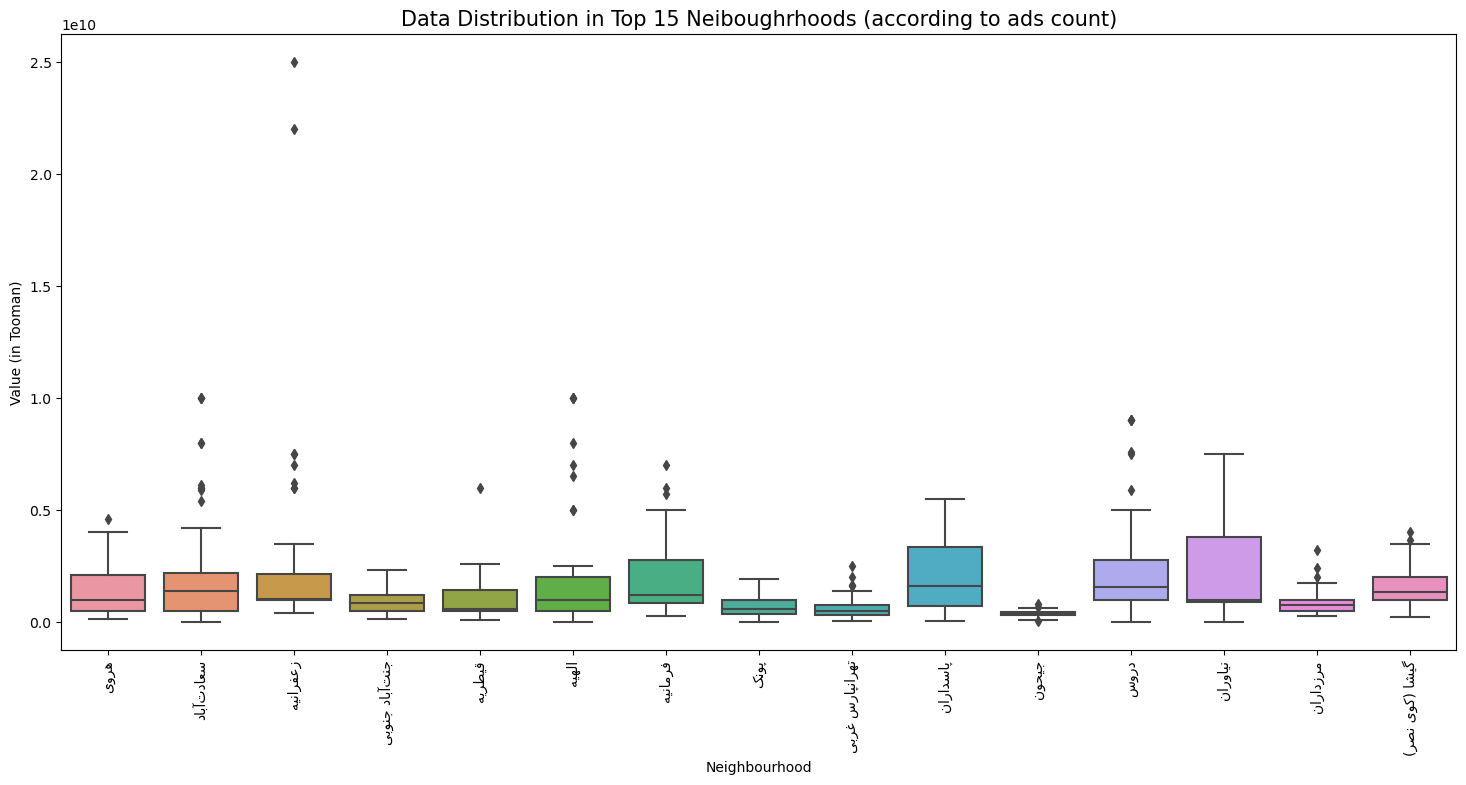

In [81]:
# Data distribution in top 15 neighbourhoods according to ads count
plt.figure(figsize= (18, 8))

df_head_provinces = pd.DataFrame(df['neighborhood'].value_counts(sort = True))
df_top_15 = df[df['neighborhood'].isin(df_head_provinces.head(15).index)]

sns.boxplot(x = [get_display(reshape(label)) for label in df_top_15['neighborhood']] 
            , y = "total_value", data = df_top_15)
# plt.title(get_display(reshape('توزیع داده در 15 محله پر آگهی')),fontsize="15")
plt.title('Data Distribution in Top 15 Neiboughrhoods (according to ads count)',fontsize="15")
plt.xlabel('Neighbourhood');
plt.ylabel('Value (in Tooman)');
plt.xticks(rotation = "vertical")
plt.show()

# Model Evaluation, Tuning and Prediction

In [82]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

!pip install xgboost
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor

### Generate Input Array and Output Vector
In order to build my model, I need to get dummies of neighborhood and change the type of data set to numpy array.

The input array will have 5276 records and 96 features and the output vector will have 5276 elements at the end.

In [95]:
df_main = pd.get_dummies(df, columns=["neighborhood"])

df_main.drop(columns=['rent','deposit','longitude', 'latitude'], inplace=True, axis=1)
#drop longtitude and latitude Nan
# df_main = df_main.dropna(subset=['longitude', 'latitude'])
print(df_main.shape)

temp_data = df_main.to_numpy()
X = temp_data[:,1:]
y = temp_data[:,0]

(2203, 256)


### Comparing Different Algorithms of Regression
At first, I prepare train and test sets for inputs and outputs. I use cross validation to ensure that the score and error values are more accurate.

I compare different algorithms of regression to pick the best one as my model. For this purpose, I declare some lists and fuctions to calculate and show the performance of each regression algorithm.

In [100]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [101]:
Model = []
RMSE = []
MAE = []
MSE = []
R_Square = []
adj_rsquared = []
CV = []
Score = []

names = ["ExtraTrees Regressor", "Gradient Boosting Regressor", "Random Forest Regressor",  
         "Bagging Regressor","XGB Regressor","Linear Regression", "Ridge Regression", 
         "Lasso Regression", "Decision Tree Regressor", "XGBRF Regressor", "Adaboost Regressor"]
models = [ExtraTreesRegressor(), GradientBoostingRegressor(), RandomForestRegressor(),  
          BaggingRegressor(), XGBRegressor(), LinearRegression(), Ridge(), 
          Lasso(), DecisionTreeRegressor(), XGBRFRegressor(), AdaBoostRegressor()]

names_to_plot = ["XGBRF Regressor", "Random Forest Regressor"]
models_to_plot = [XGBRFRegressor(),  RandomForestRegressor()]

In [102]:
def evaluate(true, predicted, variable_of_model):
    MAE.append(metrics.mean_absolute_error(true, predicted))
    MSE.append(metrics.mean_squared_error(true, predicted))
    RMSE.append(np.sqrt(metrics.mean_squared_error(true, predicted)))
    R_Square.append(metrics.r2_score(true, predicted))
    n= X_test.shape[0]
    p= X_test.shape[1] - 1
    adj_rsquared.append(1 - (1 - R_Square[-1]) * ((n - 1)/(n-p-1)))
    cv_accuracies = cross_val_score(estimator = variable_of_model, X = X_train, y = y_train.ravel(), cv = 5,verbose = 1)
    CV.append(cv_accuracies.mean())
    Score.append(variable_of_model.score(X_test, y_test.ravel()))

def pred_vis(name, y_test_vis, y_pred_vis):
    if y_test_vis.shape[0] > 300:
        y_test_vis = y_test_vis[:300]
        y_pred_vis = y_pred_vis[:300]
        
    y_test_m_vis = y_test_vis
    plt.figure(figsize=(18,5))
    plt.title("{} Prediction" .format(name))
    plt.plot(y_test_m_vis, c="steelblue", alpha=1)
    plt.plot(y_pred_vis, c="darkorange", alpha=.7,linestyle='dashed')
    legend_list = ["y_test", "y_pred"]
#     plt.xlabel("Var")
    plt.ylabel("Output")
    plt.legend(legend_list, loc=1,fontsize="10")
    plt.grid(True)
    plt.show()

def fit_and_predict(name, model):
    variable_of_model = model
    variable_of_model.fit(X_train, y_train.ravel())
    pred = variable_of_model.predict(X_test)
    evaluate(y_test, pred, variable_of_model)
    if name in names_to_plot :
        pred_vis(name, y_test, pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.5s finished


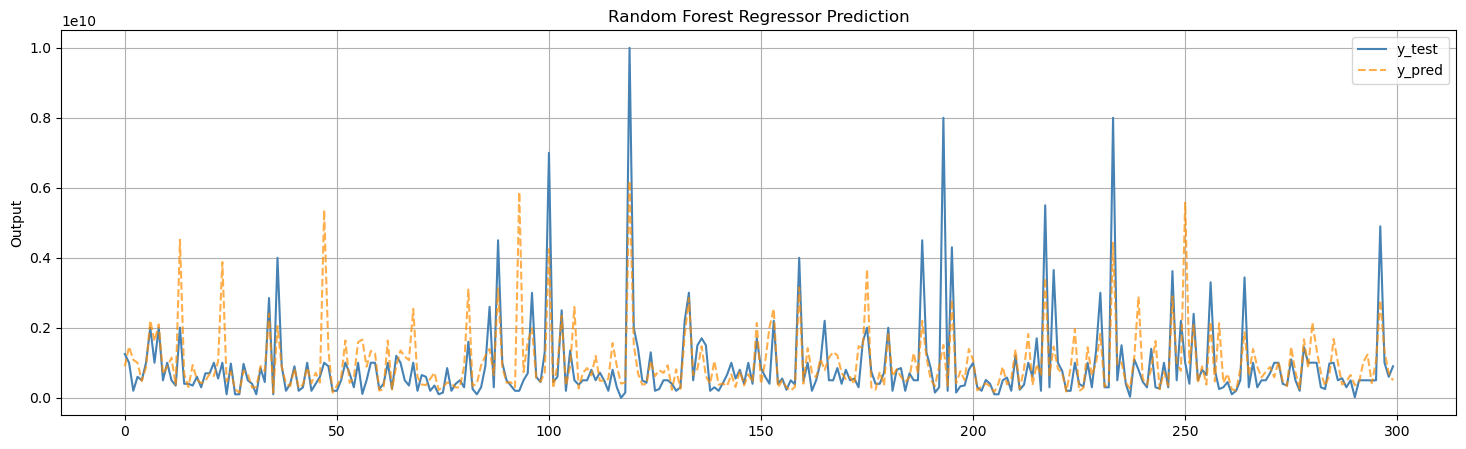

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
C:\Users\M0jtabav1\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.595e+20, tolerance: 4.390e+17
  model = cd_fast.enet_coordinate_descent(
[Parallel(n_jobs=1)]: Using backend Sequ

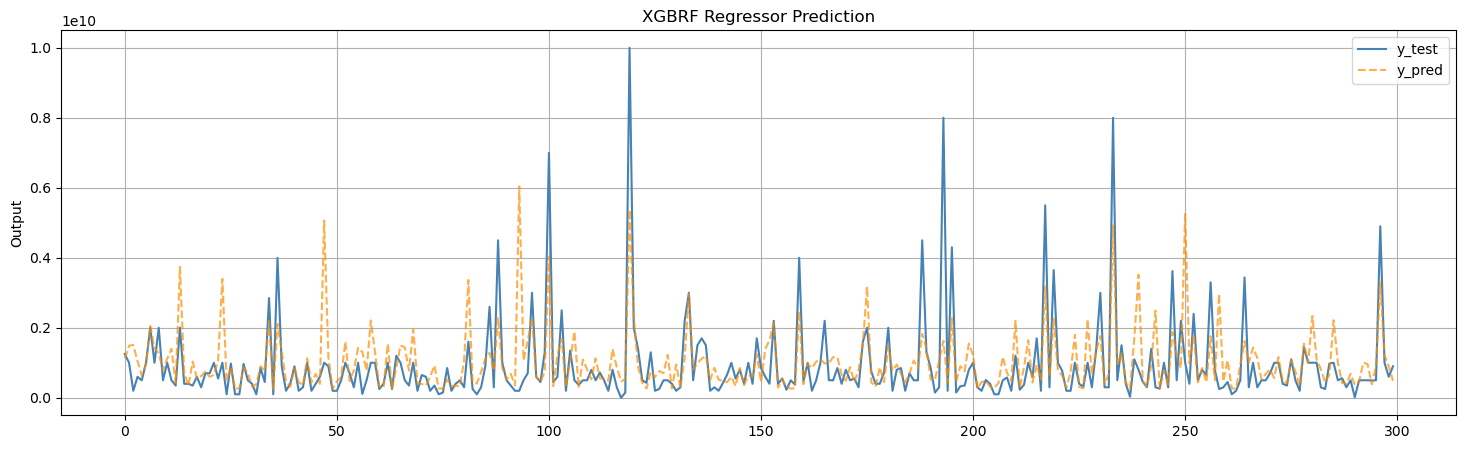

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.3s finished


In [103]:
for name, model in zip(names, models):
    fit_and_predict(name, model)

### Result
After applying fit and predict to all regression algorithms, I can get a good result of each algorithm.

Since, it is a regression task, I should pay attention to the Score and error values like MSE simultaneously.

In [104]:
evaluation_dataframe = pd.DataFrame({"Model": names,
                                     "MAE": MAE,
                                     "MSE": MSE,
                                     "RMSE": RMSE,
                                     "R Squared": R_Square,
                                     "adj R Squared": adj_rsquared,
                                     "Cross Validation": CV,
                                     "Score" : Score})

In [105]:
evaluation_dataframe.sort_values("MSE")

,Model,MAE,MSE,RMSE,R Squared,adj R Squared,Cross Validation,Score
1,Gradient Boosting Regressor,5.187203e+08,8.375441e+17,9.151743e+08,0.500841,-0.180807,4.285928e-01,0.500841
6,Ridge Regression,6.377366e+08,1.009746e+18,1.004861e+09,0.398212,-0.423585,3.340144e-01,0.398212
9,XGBRF Regressor,5.457166e+08,1.034356e+18,1.017033e+09,0.383544,-0.458282,4.118834e-01,0.383544
7,Lasso Regression,6.505550e+08,1.034706e+18,1.017205e+09,0.383336,-0.458774,3.190727e-01,0.383336
5,Linear Regression,6.507704e+08,1.036262e+18,1.017969e+09,0.382409,-0.460968,-1.991537e+20,0.382409
2,Random Forest Regressor,5.240982e+08,1.064522e+18,1.031757e+09,0.365566,-0.500810,4.509853e-01,0.365566
3,Bagging Regressor,5.197610e+08,1.146504e+18,1.070749e+09,0.316707,-0.616392,4.274993e-01,0.316707
0,ExtraTrees Regressor,5.490874e+08,1.328314e+18,1.152525e+09,0.208352,-0.872717,4.206031e-01,0.208352
4,XGB Regressor,5.745510e+08,1.371612e+18,1.171158e+09,0.182547,-0.933760,3.574985e-01,0.182547
8,Decision Tree Regressor,6.448065e+08,1.815830e+18,1.347527e+09,-0.082198,-1.560039,4.344996e-02,-0.082198
